In [1]:
%matplotlib inline

In [2]:
#parallel
from ipyparallel import Client
rc = Client(profile="default")
dview = rc[:] # use all engines
lv = rc.load_balanced_view()

In [3]:
%%px --local
import os, json
import pandas as pd
import numpy as np
import scipy
#from numpy import *
import matplotlib as mpl
from matplotlib import pyplot as plt
converter =  mpl.colors.ColorConverter()
mpl.rcParams["font.size"]=14
eu = os.path.expanduser
jn = os.path.join
meta_dir = eu("~/vervet_project/metadata")
figure_dir = eu("~/VervetPopgen/Figures")
var_ana_dir = eu("~/vervet_project/analyses/20140403_UnifiedGenotyper_ref3500_non_VRC/_data")
msmc_ana_dir = eu("~/vervet_project/analyses/20141203_msmc/_data")
autosomes = ["CAE" + str(i) for i in range(1,30)]
pops = ["aet","cyn","pyn","pys","sab","tan"]
colors = ["blue","magenta","cyan","green","orange","red"]
light_colors = [tuple([min(1,v) for v in  np.array(converter.to_rgb(c))+0.1]) for c in colors] 
pops3 = ["aet","cyn","pyn","pys","sab","sac","sar","tan"]
colors3 = ["blue","magenta","cyan","green","orange","yellow","brown","red"]
light_colors3 = [tuple([min(1,v) for v in  np.array(converter.to_rgb(c))+0.1]) for c in colors3] 

In [4]:
%%px --local
import ast
def str_to_dic(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        print s
        raise
mt = pd.read_csv(jn(meta_dir,"163_master_table.csv"),
                 index_col=0,
                 converters={"library":str_to_dic,"phenotypes":str_to_dic}
                 )

In [5]:
pop_groups = mt.groupby("pop3")

In [6]:
def get_ntuples(df,n):
    tup = tuple(df.sort("coverage",ascending=False).iloc[:n].index.values)
    if len(tup)<n:
        return None
    else:
        return tup
popsize_tuples = list(pop_groups.apply(lambda df: get_ntuples(df,2)).values) + \
                 list(pop_groups.apply(lambda df: get_ntuples(df,4)).values) + \
                 list(pop_groups.apply(lambda df: get_ntuples(df,8)).values)
popsize_tuples = [p for p in popsize_tuples if p is not None]
print popsize_tuples

[('VEC1016', 'VEB1009'), ('VZA3008', 'VZA1004'), ('AG5417', 'VKA3'), ('VSAM0021', 'VSAF1011'), ('VGA00025', 'VGA00006'), ('VWP00393', 'VWP10067'), ('B5616', 'C2166'), ('AGM141', 'AGM131'), ('VEC1016', 'VEB1009', 'VEB1010', 'VEA1004'), ('VZA3008', 'VZA1004', 'VZA1001', 'VZA2006'), ('AG5417', 'VKA3', 'VKD7', 'VKB7'), ('VSAM0021', 'VSAF1011', 'VSAB2011', 'VSAA2015'), ('VGA00025', 'VGA00006', 'VGA00156', 'VGA00146'), ('VWP00393', 'VWP10067', 'VWP00494', 'VWP00312'), ('B5616', 'C2166', 'C2265', 'C2439'), ('AGM141', 'AGM131', 'AGM142', 'AGM144'), ('VEC1016', 'VEB1009', 'VEB1010', 'VEA1004', 'VEA1003', 'VEA1002', 'VEA1005', 'VEA1001'), ('VZA3008', 'VZA1004', 'VZA1001', 'VZA2006', 'VZC1015', 'VZC1017', 'VZC1018', 'VZA3010'), ('VSAM0021', 'VSAF1011', 'VSAB2011', 'VSAA2015', 'VSAF1015', 'VSAB3004', 'VSAE3003', 'VSAB2012'), ('VGA00025', 'VGA00006', 'VGA00156', 'VGA00146', 'VGA00142', 'VGA00138', 'VGA00101', 'VGA00152'), ('VWP00393', 'VWP10067', 'VWP00494', 'VWP00312', 'VWP10026', 'VWP10008', 'VWP

In [7]:
mt

,country,orig_quality_format,species,phenotypes,age,age_cas,age_approx,site,longitude,latitude,coverage,library,pop3,pop_marker,population,pop2
ucla_id,,,,,,,,,,,,,,,,
A8518,Barbados,phred33,Chlorocebus sabaeus,{u'Weight': 5.29},1,NaN,NaN,Hackleton Cliff,-59.522395,13.200256,4.0,{u'gerald_D0YRKACXX_2_TTAGGC': {u'path_mate1_p...,sar,orange_circle,sab,sac
AG23,Tanzania,phred33,Chlorocebus pygerythrus pygerythrus,{},NaN,NaN,NaN,UnknownTanzania,35.000000,-7.000000,3.7,{u'gerald_C0RKNACXX_7_CCCATG': {u'path_mate1_p...,pyn,grn_circle,pyg,pyn
AG5417,Tanzania,phred33,Chlorocebus pygerythrus pygerythrus,{},14,NaN,NaN,UnknownTanzania,35.000000,-7.000000,10.3,{u'gerald_7012KAAXX_1': {u'path_mate1_phred33'...,pyn,grn_circle,pyg,pyn
AGM126,Central African Republic,phred33,Chlorocebus tantalus,{},NaN,NaN,NaN,Bangui,18.583333,4.366667,4.1,{u'gerald_D0YKWACXX_8_AAGCGA': {u'path_mate1_p...,tan,red_circle,tan,tan
AGM127,Central African Republic,phred33,Chlorocebus tantalus,{},NaN,NaN,NaN,Bangui,18.583333,4.366667,4.5,{u'gerald_D0YRKACXX_4_CTAGCT': {u'path_mate1_p...,tan,red_circle,tan,tan
AGM129,Central African Republic,phred33,Chlorocebus tantalus,{},NaN,NaN,NaN,Bangui,18.583333,4.366667,4.7,{u'gerald_C0RDDACXX_7_GGCCTG': {u'path_mate1_p...,tan,red_circle,tan,tan
AGM130,Central African Republic,phred33,Chlorocebus tantalus,{},NaN,NaN,NaN,Bangui,18.583333,4.366667,4.6,{u'gerald_D0YRKACXX_1_GACGGA': {u'path_mate1_p...,tan,red_circle,tan,tan
AGM131,Central African Republic,phred33,Chlorocebus tantalus,{},NaN,NaN,NaN,Bangui,18.583333,4.366667,4.8,{u'gerald_C0RDDACXX_5_GTAGAG': {u'path_mate1_p...,tan,red_circle,tan,tan
AGM136,Central African Republic,phred33,Chlorocebus tantalus,{},NaN,NaN,NaN,Bangui,18.583333,4.366667,4.5,{u'gerald_D0YRKACXX_2_GCTCCA': {u'path_mate1_p...,tan,red_circle,tan,tan


In [8]:
#indiviudals of different coverage from one sampling location
compare_cov_tuples = [('VSAA2010',), ('VSAA2015',), ('VSAA2020',),('VSAA2010','VSAA2020')]

In [9]:
#duos Ghana, Gambia, Tantalus
#4-tuples Caribbean, Gambia
#4-tuples Ghana, Gambia, Tantalus
sabtan_sep_tuples = [("VGHA1001","AGM141"),("VGA00025","AGM141"), ("VGA00025","VGHA1001")] + \
             [("B5616", "C2166","VWP10067", "VWP10008"),
              ("B5616", "C2166","VWP00393","VWP00494"),
              ("VWP10067", "VWP10008","VWP00393", "VWP00494"),
              ("B5616", "C2166","VGA00025", "VGA00006"),
              ("VWP00393", "VWP00494","VGA00025", "VGA00006")] + \
             [("VGHA1001","VGHB1002",'AGM141', 'AGM131'),
              ("VGA00025", "VGA00006",'AGM141', 'AGM131'),
              ("VGA00025", "VGA00006","VGHA1001","VGHB1002")] 

In [10]:
sab_groups = mt[mt["species"]=="Chlorocebus sabaeus"].groupby("country")

In [11]:
sab_groups.apply(lambda df: tuple(df.sort("coverage",ascending=False).iloc[:2].index.values))

country
Barbados             (B5616, C2166)
Gambia         (VGA00025, VGA00006)
Ghana          (VGHA1001, VGHB1002)
Nevis          (VWP10067, VWP10008)
Saint Kitts    (VWP00393, VWP00494)
dtype: object

In [12]:
mt[mt["species"]=="Chlorocebus tantalus"].sort("coverage",ascending=False).iloc[:2].index.values

array(['AGM141', 'AGM131'], dtype=object)

In [16]:
compare_cov_tuples

[('VSAA2010',), ('VSAA2015',), ('VSAA2020',), ('VSAA2010', 'VSAA2020')]

In [46]:
%matplotlib inline

In [9]:
import itertools

In [13]:
#%%px --local
high_cov_ucla_ids = ['AG5417', 'AGM141', 'B5616', 'VEC1016', 'VGA00006', 'VGA00025',
                                                               'VSAM0021', 'VZA3008']
#
#id_tuples = [[id] for id in high_cov_ucla_ids] + list(itertools.combinations(high_cov_ucla_ids,2)) + [["AG5417","VSAM0021","VGA00006","VGA00025"]]
id_tuples = popsize_tuples + compare_cov_tuples + sabtan_sep_tuples
id_tuples_str = ["_".join(tpl) for tpl in id_tuples]

In [480]:
%%px --local
#take the sites from df but add the genotypes from phase df
def make_phased_input(id):
    errors = []
    for chrom in autosomes:
        try:
            df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
            #phase df can have some more entries (sites where the genotype is missing in the original df)
            phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
            df[3] = phase_df.ix[df.index][3]
            df.to_csv(jn(msmc_ana_dir,"msmc_input_{}_phased_{}.tsv".format(id,chrom)),sep="\t",header=None)
        except Exception, e:
            errors.append(str(e))
    return errors

In [483]:
map_make_phased = lv.map_async(make_phased_input, id_tuples_str)

In [486]:
map_make_phased.wait(10)

In [ ]:
#take the sites from df but add the genotypes from phase df
mising_data = []
for id in id_tuples_str:
    for chrom in autosomes:
        try:
            df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
            #phase df can have some more entries (sites where the genotype is missing in the original df)
            phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
            #print id,chrom,"entries missing due to missing data:",(len(phase_df)-len(df))*1./len(phase_df)
            missing_data.append((id,chrom,(len(phase_df)-len(df))*1./len(phase_df)))
            df[3] = phase_df.ix[df.index][3]
            df.to_csv(jn(msmc_ana_dir,"msmc_input_{}_phased_{}.tsv".format(id,chrom)),sep="\t",header=None)
        except Exception, e:
            print str(e)

In [ ]:
make_phased_input()

In [ ]:
#make input for single haplotype per population

In [ ]:
id= "_".join(["AG5417","VSAM0021","VGA00006","VGA00025"])
#for chrom in autosomes:
chrom = CAE28
    try:
        df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
        #phase df can have some more entries (sites where the genotype is missing in the original df)
        phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
        #print id,chrom,"entries missing due to missing data:",(len(phase_df)-len(df))*1./len(phase_df)
        missing_data.append((id,chrom,(len(phase_df)-len(df))*1./len(phase_df)))
        
        df[3] = phase_df.ix[df.index][3].apply(lambda x: x[::2])
        df[3] = phase_df.ix[df.index][3]
        df.to_csv(jn(msmc_ana_dir,"msmc_input_{}_phased_{}.tsv".format(id,chrom)),sep="\t",header=None)
    except Exception, e:
        print str(e)

In [368]:
list(itertools.combinations(high_cov_ucla_ids,2))

[('AG5417', 'AGM141'),
 ('AG5417', 'B5616'),
 ('AG5417', 'VEC1016'),
 ('AG5417', 'VGA00006'),
 ('AG5417', 'VGA00025'),
 ('AG5417', 'VSAM0021'),
 ('AG5417', 'VZA3008'),
 ('AGM141', 'B5616'),
 ('AGM141', 'VEC1016'),
 ('AGM141', 'VGA00006'),
 ('AGM141', 'VGA00025'),
 ('AGM141', 'VSAM0021'),
 ('AGM141', 'VZA3008'),
 ('B5616', 'VEC1016'),
 ('B5616', 'VGA00006'),
 ('B5616', 'VGA00025'),
 ('B5616', 'VSAM0021'),
 ('B5616', 'VZA3008'),
 ('VEC1016', 'VGA00006'),
 ('VEC1016', 'VGA00025'),
 ('VEC1016', 'VSAM0021'),
 ('VEC1016', 'VZA3008'),
 ('VGA00006', 'VGA00025'),
 ('VGA00006', 'VSAM0021'),
 ('VGA00006', 'VZA3008'),
 ('VGA00025', 'VSAM0021'),
 ('VGA00025', 'VZA3008'),
 ('VSAM0021', 'VZA3008')]

In [392]:
pair = 0 #only take 2,4,.. haplotypes
id_tuples = list(itertools.combinations(high_cov_ucla_ids,2)) + [("AG5417","VSAM0021","VGA00006","VGA00025")] 
for id_tuple in id_tuples[:1]:
    for pair in [0,1]:
        id= "_".join(id_tuple)
        for chrom in autosomes:
            df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
                        #phase df can have some more entries (sites where the genotype is missing in the original df)
            phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)

            df[3] = phase_df.ix[df.index][3].apply(lambda x: x[pair::2])
            non_seg = df[df[3].apply(lambda s: s == len(s) * s[0]).values]
            seg = df.ix[df.index.diff(non_seg.index)]
            #ilob missing values are located in the non-missing data_frame
            add_to_index = seg.index.droplevel(0).searchsorted(non_seg.index.droplevel(0)).values
            #add the non-seg counts of the non-segregating locus to the next segregating locus
            seg.loc[chrom,2] = seg.ix[chrom][2].add(pd.Series(non_seg[2].values,
                                                              index=seg.ix[chrom].iloc[add_to_index].index).groupby(lambda x:x).sum(),fill_value=0).values
            seg.to_csv(jn(msmc_ana_dir,"msmc_input_{}_haplo{}_phased_{}.tsv".format(id,"".join([str(i) for i in range(pair,len(id_tuple)*2,2)]),chrom)),sep="\t",header=None)

IndexError: positional indexers are out-of-bounds

In [ ]:
pair = 0 #only take 2,4,.. haplotypes
id_tuples = list(itertools.combinations(high_cov_ucla_ids,2)) + [("AG5417","VSAM0021","VGA00006","VGA00025")] 
for id_tuple in id_tuples[1:]:
    for pair in [0,1]:
        id= "_".join(id_tuple)
        for chrom in autosomes:
            df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
                        #phase df can have some more entries (sites where the genotype is missing in the original df)
            phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)

            df[3] = phase_df.ix[df.index][3].apply(lambda x: x[pair::2])
            df.to_csv(jn(msmc_ana_dir,"msmc_input_incl_nonseg_{}_haplo{}_phased_{}.tsv".format(id,"".join([str(i) for i in range(pair,len(id_tuple)*2,2)]),chrom)),sep="\t",header=None)

In [490]:
%%px --local
def select_haplotypes(id_tuple,pair=0):
    id= "_".join(id_tuple)
    for chrom in autosomes:
        df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
                    #phase df can have some more entries (sites where the genotype is missing in the original df)
        phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)

        df[3] = phase_df.ix[df.index][3].apply(lambda x: x[pair::2])
        df.to_csv(jn(msmc_ana_dir,"msmc_input_incl_nonseg_{}_haplo{}_phased_{}.tsv".format(id,"".join([str(i) for i in range(pair,len(id_tuple)*2,2)]),chrom)),sep="\t",header=None)

In [491]:
id_tuples = popsize_tuples + [tpl for tpl in compare_cov_tuples if len(tpl)>=2] + [tpl for tpl in sabtan_sep_tuples if len(tpl)>=4]

In [492]:
map_sel_haplo = lv.map_async(select_haplotypes,id_tuples)

In [494]:
map_sel_haplo.wait(10)

In [495]:
map_sel_haplo.result

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Results

In [6]:
mu=1.5e-8
generation_time = 8.5

In [7]:
ids = ['AG5417', 'AGM141', 'B5616', 'VEC1016', 'VGA00006', 'VGA00025',
                                                               'VSAM0021', 'VZA3008']

### Popsize mode

#### a) all pop highest coverage

In [18]:
mpl.rcParams["font.size"]=16

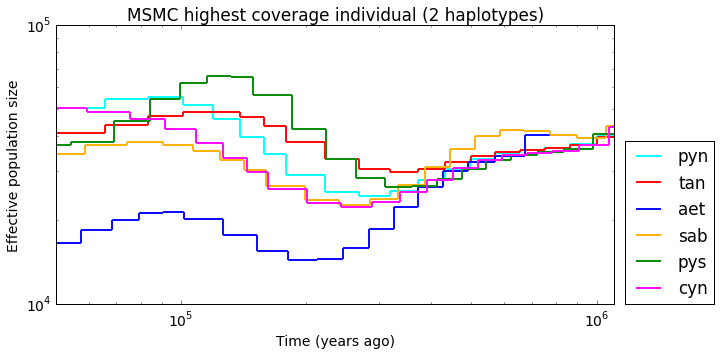

In [45]:
# Two haplotypes
ids = ['AG5417', 'AGM141', 'VEC1016', 'VGA00025','VSAM0021', 'VZA3008']
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    pop = mt.ix[id.split("_")]["pop3"].values[0]
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=pop,color=light_colors3[pops3.index(pop)]) 
    ax.add_collection(lc)
ax.autoscale()
ax.margins(0.05)
ax.set_xlim([50000,1.1*10**6])
ax.set_ylim([10000,100000])
ax.set_xscale('log')
ax.set_yscale('log')
    #ax.set_xscale('log')
    #ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc=(1.02,0))
plt.title("MSMC highest coverage individual (2 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

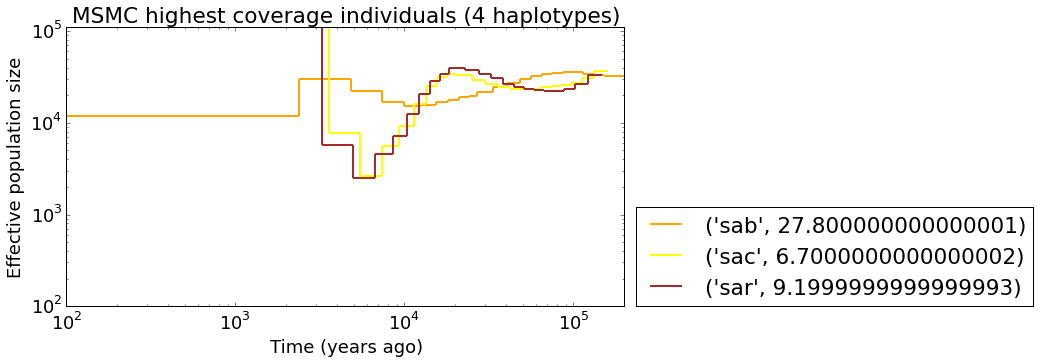

In [104]:
# 4 haplotypes
ids = ["_".join(p) for p in popsize_tuples if len(p)==2]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    pop = mt.ix[id.split("_")]["pop3"].values[0]
    if pop not in ["sar","sac","sab"]: #only plot African
        continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=(pop, mt.ix[id.split("_")]["coverage"].values[0]),color=colors3[pops3.index(pop)]) 
    ax.add_collection(lc)
ax.autoscale()
ax.margins(0.05)
ax.set_xlim([0.1*10**3,2*10**5])
ax.set_ylim([100,110000])
ax.set_xscale('log')
ax.set_yscale('log')
    #ax.set_xscale('log')
    #ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc=(1.02,0))
plt.title("MSMC highest coverage individuals (4 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

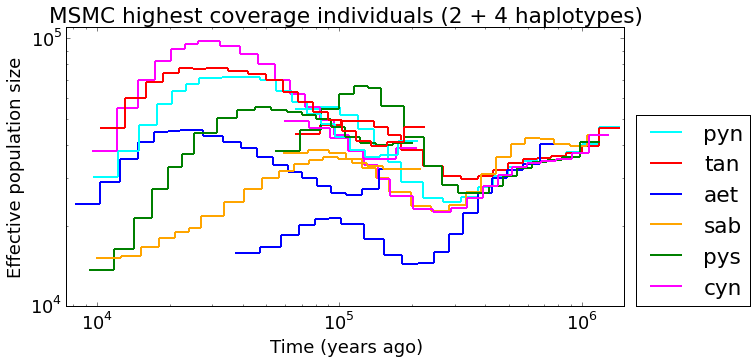

In [96]:
white_on_transparent = False
save_fig = False
# two + four haplotypes
ids =   ['AG5417', 'AGM141', 'VEC1016', 'VGA00025','VSAM0021', 'VZA3008'] + ["_".join(p) for p in popsize_tuples if len(p)==2]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    pop = mt.ix[id.split("_")]["pop3"].values[0]
    if pop not in pops: #only plot African
        continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df = time_df.iloc[4:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    if len(id.split("_"))==1:
        label= pop
    else: 
        label = None
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=label,color=colors3[pops3.index(pop)]) 
    ax.add_collection(lc)
ax.autoscale()
ax.margins(0.05)
ax.set_xlim([7.5*10**3,1.5*10**6])
ax.set_ylim([10000,110000])
ax.set_xscale('log')
ax.set_yscale('log')
    #ax.set_xscale('log')
    #ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
l = plt.legend(loc=(1.02,0))
title_obj = plt.title("MSMC highest coverage individuals (2 + 4 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")
if white_on_transparent:  
    ax=plt.gca()
    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    ax.yaxis.label.set_color('w')
    ax.xaxis.label.set_color('w')
    plt.setp(title_obj, color='w')
    for text in l.get_texts():
        text.set_color("w")
    #cbytick_obj = plt.getp(colorbar.ax.axes, 'yticklabels')                #tricky
    #plt.setp(cbytick_obj, color='w')
    for child in ax.get_children():
        if isinstance(child, mpl.spines.Spine):
            child.set_color("white")
    plt.tick_params(which='minor', color='w')
    #mappable.set_alpha(1)
    #mappable.set_linewidth(0) #this is important to avoid black lines in transparent SVG
    l.legendPatch.set_alpha(0.)
if save_fig:
    #plt.tight_layout()
    plt.savefig(jn(figure_dir,'msms_popsize_2hap_2hap.svg'), transparent=True,bbox_extra_artists=(l,), bbox_inches='tight')

In [56]:
ax.get_children()

In [584]:
# 8 haplotypes
#Did not work! No output.

#### b) Dependance on coverage

In [585]:
mt[mt["coverage"]>20]

,country,orig_quality_format,species,phenotypes,age,age_cas,age_approx,site,longitude,latitude,coverage,library,pop3
ucla_id,,,,,,,,,,,,,
VGA00025,Gambia,phred64,Chlorocebus sabaeus,"{u'Rep.Active': 1.0, u'Weight': 4.26, u'diagno...",7,7,NaN,ITC/BIJILO,-16.725633,13.435133,27.8,{u'VGA00025_AGCGATAG_AGCGATAG_AGCGATAG_AGCGATA...,sab
VSAM0021,South Africa,phred64,Chlorocebus pygerythrus pygerythrus,"{u'Humerus': 11.5, u'Head': 10.0, u'Chest girt...",8,NaN,NaN,Intaka Lodge,26.671900,-33.682700,44.8,{u'VSAM0021_TCTCGCGC_TCTCGCGC_TCTCGCGC_TCTCGCG...,pys


In [591]:
[tpl for tpl in compare_cov_tuples if len(tpl)==1]

[('VSAA2010',), ('VSAA2015',), ('VSAA2020',)]

In [600]:
compare_cov_tuples

[('VSAA2010',), ('VSAA2015',), ('VSAA2020',), ('VSAA2010', 'VSAA2020')]

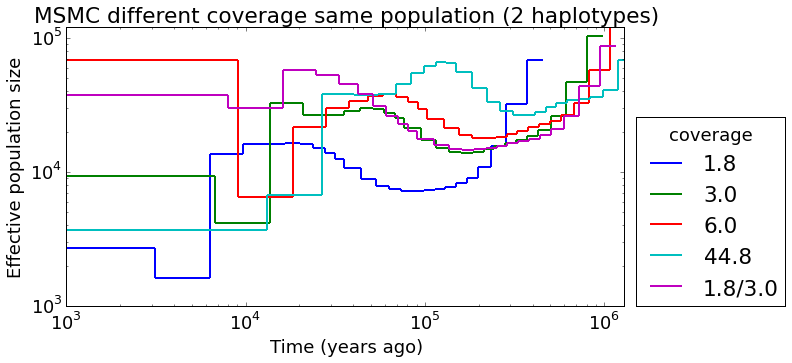

In [100]:
# Two haplotypes
ids = [('VSAA2010',), ('VSAA2020',),('VSAA2015',)] + [("VSAM0021",)]
ids = ["_".join(t) for t in ids]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
#jet = cm = plt.get_cmap('jet') 
#cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
#scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    #colorVal = scalarMap.to_rgba(i)
    cov = mt.ix[id.split("_")]["coverage"].values[0]
    if pop not in pops: #only plot African
        continue
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    #time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=cov,color=mpl.rcParams['axes.color_cycle'][i]) 
    ax.add_collection(lc)
id_tuple = ("VSAA2010","VSAA2020")
id = "_".join(id_tuple)
pair = 0
haplo_str = "".join([str(j) for j in range(pair,len(id_tuple)*2,2)])
time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mpl.collections.LineCollection(lines, linewidths=2,label="/".join([str(f) for f in mt.ix[id.split("_")]["coverage"].values]),color=mpl.rcParams['axes.color_cycle'][i+1]) 
ax.add_collection(lc)
    
ax.set_xlim([0.1*10**4,1.3*10**6])
ax.set_ylim([1000,1.2*10**5])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc=(1.02,0), title="coverage")
plt.title("MSMC different coverage same population (2 haplotypes)")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Effective population size")

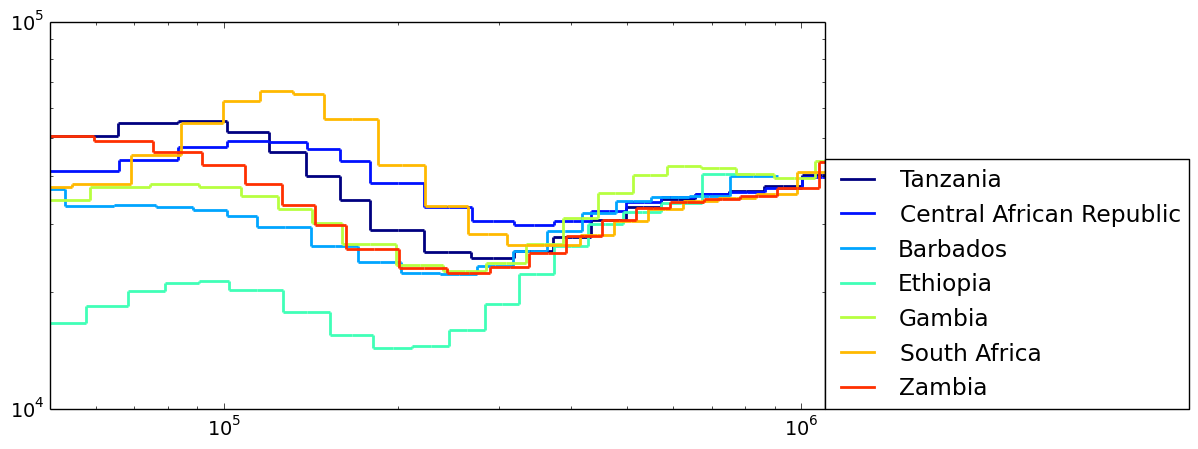

In [664]:
ids = ['AG5417', 'AGM141', 'B5616', 'VEC1016', 'VGA00025',
                                                               'VSAM0021', 'VZA3008']
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    colorVal = scalarMap.to_rgba(i)
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df = time_df.iloc[:-4]
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
    lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label="".join(mt.ix[id.split("_")]["country"].values),color=colorVal) 
    ax.add_collection(lc)
ax.autoscale()
ax.margins(0.05)
ax.set_xlim([50000,1.1*10**6])
ax.set_ylim([10000,100000])
ax.set_xscale('log')
ax.set_yscale('log')
    #ax.set_xscale('log')
    #ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc=(1,0))

#### c) old divergences (pairs with one haplotype per populations)

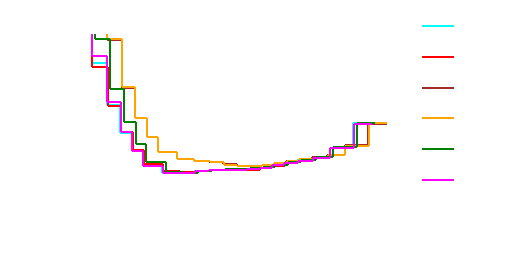

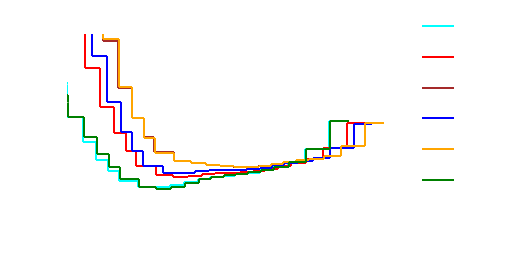

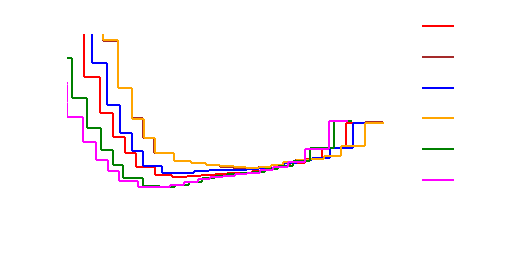

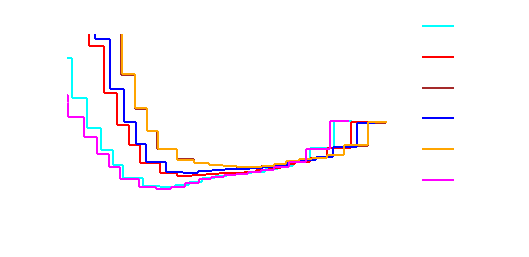

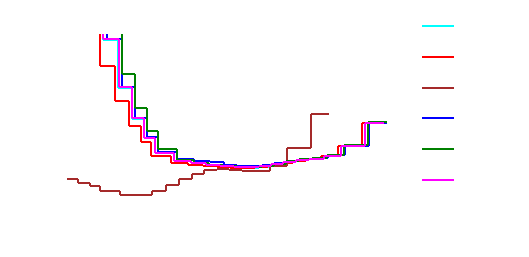

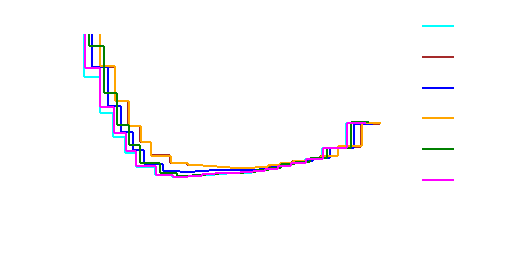

In [87]:
mpl.rcParams["font.size"]=18
ymax = 10**6
xmin = 1.2*10**5
# Two haplotypes
for f_pop in pops:
    id_tuples =  [t for t in itertools.combinations(high_cov_ucla_ids,2) if f_pop in mt.ix[list(t)]["pop3"].values and 'VGA00006' not in t]
    fig, ax = plt.subplots(figsize=(6,3))
    #jet = cm = plt.get_cmap('jet') 
    #cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
    #scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
    for i,id_tuple in enumerate(id_tuples):
        id = "_".join(id_tuple)
        #colorVal = scalarMap.to_rgba(i)
        pair = 0
        haplo_str = "".join([str(i) for i in range(pair,len(id_tuple)*2,2)])
        pop = [p for p in mt.ix[id.split("_")]["pop3"].values if p!=f_pop][0]
        time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
        #time_df = time_df.iloc[:-4]
        time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
        time_df["Ne"] = 1/(2*mu*time_df["lambda_00"])
        time_df["Ne"][time_df["Ne"]>ymax] = ymax
        time_df["right_time_boundary"][time_df["right_time_boundary"]<xmin] = xmin
        time_df["left_time_boundary"][time_df["left_time_boundary"]<xmin] = xmin
        lines = [[(el[1]["left_time_boundary"],el[1]["Ne"]),(el[1]["right_time_boundary"],el[1]["Ne"])] for el in time_df.iterrows()]
        lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
        #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
        lc = mpl.collections.LineCollection(lines, linewidths=2,label=pop,color=colors3[pops3.index(pop)]) 
        ax.add_collection(lc)
        
    ax.autoscale()
    ax.margins(0.05)
    ax.set_xlim([xmin,5*10**6])
    ax.set_ylim([2*10**4,ymax])
    ax.set_xscale('log')
    ax.set_yscale('log')
        #ax.set_xscale('log')
        #ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    #plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    l = plt.legend(loc=(1.02,0))
    title_obj = plt.title("MSMC {} vs others".format(f_pop))
    ax.set_xlabel("Time (years ago)")
    ax.set_ylabel("Effective population size")
    if white_on_transparent:  
        ax=plt.gca()
        ax.set_clip_on(False)
        ax.tick_params(axis='x', colors='w')
        ax.tick_params(axis='y', colors='w')
        ax.yaxis.label.set_color('w')
        ax.xaxis.label.set_color('w')
        plt.setp(title_obj, color='w')
        for text in l.get_texts():
            text.set_color("w")
        #cbytick_obj = plt.getp(colorbar.ax.axes, 'yticklabels')                #tricky
        #plt.setp(cbytick_obj, color='w')
        for child in ax.get_children():
            if isinstance(child, mpl.spines.Spine):
                child.set_color("white")
        plt.tick_params(which='minor', color='w')
        #mappable.set_alpha(1)
        #mappable.set_linewidth(0) #this is important to avoid black lines in transparent SVG
        l.legendPatch.set_alpha(0.)
    if save_fig:
        #plt.tight_layout()
        
        plt.savefig(jn(figure_dir,'msms_popsize_{}_vs_others1.svg'.format(f_pop)), transparent=True,bbox_extra_artists=(l,), bbox_inches='tight')

### Separation

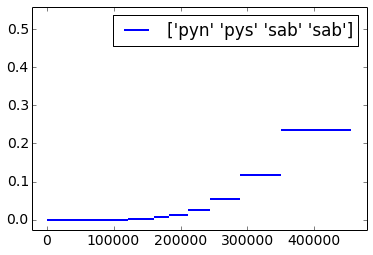

In [156]:
fig, ax = plt.subplots()
time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_out_VGA00025_VSAM0021.final.txt"),sep="\t",index_col=0)
time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mpl.collections.LineCollection(lines, linewidths=2,label=mt.ix[id.split("_")]["pop3"].values,color=mpl.rcParams['axes.color_cycle'][0]) 
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.05)
plt.legend()

In [ ]:
Conclusion: Only use 2 haplotypes to get further in the past!

#### Cyn pyn pys

In [9]:
white_on_transparent = False
save_fig = False#True

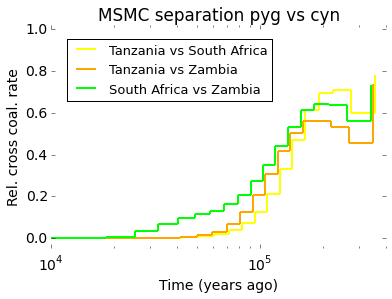

In [13]:
ids = ["AG5417_VSAM0021","AG5417_VZA3008","VSAM0021_VZA3008"]
xmin = 10**4
fig, ax = plt.subplots()
colors = ['yellow','orange','lime']
for i,id in enumerate(ids):
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_0011_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    time_df["right_time_boundary"][time_df["right_time_boundary"]<xmin] = xmin
    time_df["left_time_boundary"][time_df["left_time_boundary"]<xmin] = xmin
    lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=" vs ".join(mt.ix[id.split("_")]["country"].values),color=colors[i]) 
    ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.05)
l = plt.legend(loc=(0.05,0.66),prop={'size':13})
ax.set_xlim([xmin,4*10**5])
ax.set_ylim([-.05,1.02])
ax.set_xscale('log')
title_obj = plt.title("MSMC separation pyg vs cyn")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Rel. cross coal. rate")
if white_on_transparent:  
    ax=plt.gca()
    ax.set_clip_on(False)
    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    ax.yaxis.label.set_color('w')
    ax.xaxis.label.set_color('w')
    plt.setp(title_obj, color='w')
    for text in l.get_texts():
        text.set_color("w")
    #cbytick_obj = plt.getp(colorbar.ax.axes, 'yticklabels')                #tricky
    #plt.setp(cbytick_obj, color='w')
    for child in ax.get_children():
        if isinstance(child, mpl.spines.Spine):
            child.set_color("white")
    plt.tick_params(which='minor', color='w')
    #mappable.set_alpha(1)
    #mappable.set_linewidth(0) #this is important to avoid black lines in transparent SVG
    l.legendPatch.set_alpha(0.)
  
if save_fig:
    #plt.tight_layout()

    plt.savefig(jn(figure_dir,'msms_cyn_pyn_vs_pys.svg'), transparent=True,bbox_extra_artists=(l,), bbox_inches='tight')

In [ ]:
ids = ["AG5417_VSAM0021","AG5417_VZA3008","VSAM0021_VZA3008"]
fig, ax = plt.subplots()
jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_0011_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=" vs ".join(mt.ix[id.split("_")]["country"].values),color=scalarMap.to_rgba(i)) 
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.05)
    plt.legend(loc=(0.5,0.05))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#### Sab Ghana vs. Gambia vs. Tan

In [15]:
import colorbrewer

In [20]:
mpl.rcParams['svg.fonttype'] = 'none'

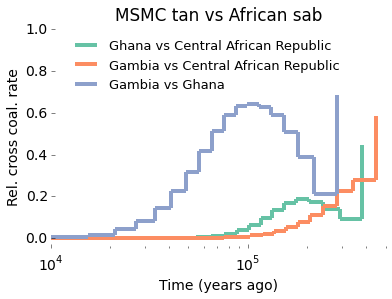

In [23]:
id_tuples = [("VGHA1001","AGM141"),("VGA00025","AGM141"), ("VGA00025","VGHA1001")]
fig, ax = plt.subplots()
jet = cm = plt.get_cmap('jet') 
colors = [[i/255. for i in c] for c in  colorbrewer.Set2[3]]#['yellow','orange','lime']
for i,id_tuple in enumerate(id_tuples):
    id = "_".join(id_tuple)
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_0011_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=4,label=" vs ".join(mt.ix[id.split("_")]["country"].values),color=colors[i]) 
    ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.05)
l = plt.legend(loc=(0.05,0.68),prop={'size':13})
ax.set_xlim([10**4,5*10**5])
ax.set_ylim([-.05,1.02])
ax.set_xscale('log')
plt.title("MSMC tan vs African sab")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Rel. cross coal. rate")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
l.legendPatch.set_alpha(0.)
plt.savefig(jn(figure_dir,'msmc_sep_ghana_vs_gambia_vs_tan.svg'), transparent=True,bbox_extra_artists=(l,), bbox_inches='tight')

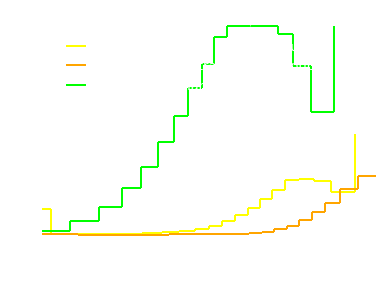

In [17]:
#similar to above but each haplotype from different individual
id_tuples = [("VGHA1001","VGHB1002",'AGM141', 'AGM131'),
              ("VGA00025", "VGA00006",'AGM141', 'AGM131'),
              ("VGA00025", "VGA00006","VGHA1001","VGHB1002")]
fig, ax = plt.subplots()
colors = ['yellow','orange','lime']
for i,id_tuple in enumerate(id_tuples):
    id = "_".join(id_tuple)
    pair = 0
    haplo_str = "".join([str(j) for j in range(pair,len(id_tuple)*2,2)])
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_0011_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
    time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=" vs ".join(mt.ix[id.split("_")]["country"].values[::2]),color=colors[i]) 
    ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.05)
l = plt.legend(loc=(0.05,0.66),prop={'size':13})
ax.set_xlim([10**4,4*10**5])
ax.set_ylim([-.05,1.02])
ax.set_xscale('log')
title_obj = plt.title("MSMC separation tan vs sab")
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Rel. cross coal. rate")

if white_on_transparent:  
    ax=plt.gca()
    ax.set_clip_on(False)
    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    ax.yaxis.label.set_color('w')
    ax.xaxis.label.set_color('w')
    plt.setp(title_obj, color='w')
    for text in l.get_texts():
        text.set_color("w")
    #cbytick_obj = plt.getp(colorbar.ax.axes, 'yticklabels')                #tricky
    #plt.setp(cbytick_obj, color='w')
    for child in ax.get_children():
        if isinstance(child, mpl.spines.Spine):
            child.set_color("white")
    plt.tick_params(which='minor', color='w')
    #mappable.set_alpha(1)
    #mappable.set_linewidth(0) #this is important to avoid black lines in transparent SVG
    l.legendPatch.set_alpha(0.)
if save_fig:
    #plt.tight_layout()

    plt.savefig(jn(figure_dir,'msms_sep_ghana_vs_gambia_vs_tan.svg'), transparent=True,bbox_extra_artists=(l,), bbox_inches='tight')

#### Sab Africa vs. Caribbean

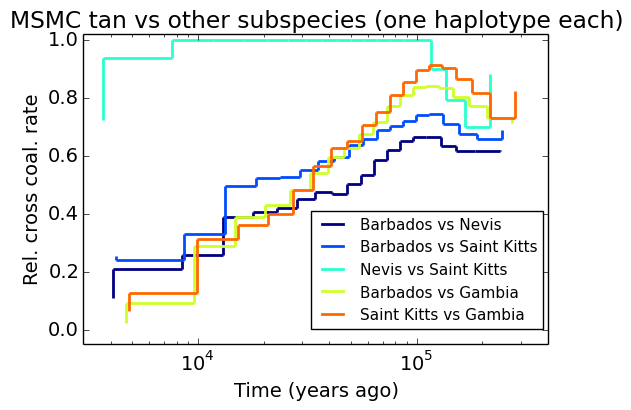

In [683]:
#similar to above but each haplotype from different individual
id_tuples = [("B5616", "C2166","VWP10067", "VWP10008"),
              ("B5616", "C2166","VWP00393","VWP00494"),
              ("VWP10067", "VWP10008","VWP00393", "VWP00494"),
              ("B5616", "C2166","VGA00025", "VGA00006"),
              ("VWP00393", "VWP00494","VGA00025", "VGA00006")] 
fig, ax = plt.subplots()
jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(id_tuples))
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id_tuple in enumerate(id_tuples):
    id = "_".join(id_tuple)
    pair = 0
    haplo_str = "".join([str(j) for j in range(pair,len(id_tuple)*2,2)])
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_0011_out_{}_haplo{}.final.txt".format(id,haplo_str)),sep="\t",index_col=0)
    time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
    lines += [[e0[1],e1[0]] for e0,e1 in zip(lines,lines[1:])]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=" vs ".join(mt.ix[id.split("_")]["country"].values[::2]),color=scalarMap.to_rgba(i)) 
    ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.05)
plt.legend(loc=(0.49,0.05),prop={'size':11})
ax.set_xlim([3*10**3,4*10**5])
ax.set_ylim([-.05,1.02])
ax.set_xscale('log')
plt.title("MSMC {} vs other subspecies (one haplotype each)".format(f_pop))
ax.set_xlabel("Time (years ago)")
ax.set_ylabel("Rel. cross coal. rate")

In [ ]:
id_tuples = list(itertools.combinations(high_cov_ucla_ids,2)) + [("AG5417","VSAM0021","VGA00006","VGA00025")] 
for id_tuple in id_tuples[1:]:
    for pair in [0,1]:
        id= "_".join(id_tuple)
        for chrom in autosomes:
            df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)
                        #phase df can have some more entries (sites where the genotype is missing in the original df)
            phase_df = pd.read_csv(jn(msmc_ana_dir,"msmc_input_{}_beagle_{}.tsv".format(id,chrom)),sep="\t",index_col=[0,1],header=None)

            df[3] = phase_df.ix[df.index][3].apply(lambda x: x[pair::2])
            df.to_csv(jn(msmc_ana_dir,"msmc_input_incl_nonseg_{}_haplo{}_phased_{}.tsv".format(id,"".join([str(i) for i in range(pair,len(id_tuple)*2,2)]),chrom)),sep="\t",header=None)

In [ ]:
ids = ["AG5417_VSAM0021","AG5417_VZA3008","VSAM0021_VZA3008"]
fig, ax = plt.subplots()
jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=len(ids))
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
for i,id in enumerate(ids):
    time_df = pd.read_csv(jn(msmc_ana_dir,"msmc_sep_0011_out_{}.final.txt".format(id)),sep="\t",index_col=0)
    time_df["cross_coal"] =  2 * time_df["lambda_01"] / (time_df["lambda_00"] + time_df["lambda_11"])
    time_df[["left_time_boundary","right_time_boundary"]] = time_df[["left_time_boundary","right_time_boundary"]]*generation_time/mu
    lines = [[(el[1]["left_time_boundary"],el[1]["cross_coal"]),(el[1]["right_time_boundary"],el[1]["cross_coal"])] for el in time_df.iterrows()]
    #c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    lc = mpl.collections.LineCollection(lines, linewidths=2,label=" vs ".join(mt.ix[id.split("_")]["country"].values),color=scalarMap.to_rgba(i)) 
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.05)
    plt.legend(loc=(0.5,0.05))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [517]:
s = pd.Series(range(4),index=pd.MultiIndex.from_arrays([["C"]*2+["B"]*2,range(4)]))

In [519]:
s.ix["B"]

2    2
3    3
dtype: int64

In [525]:
s = pd.Series(range(30),index=pd.MultiIndex.from_arrays([["A"]*10+["C"]*10+["B"]*10,range(30)]))

In [526]:
x = s.iloc[::3]

In [527]:
x

A  0      0
   3      3
   6      6
   9      9
C  12    12
   15    15
   18    18
B  21    21
   24    24
   27    27
dtype: int64

In [528]:
x.ix["B"]

Series([], dtype: int64)

In [521]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 2.7.3.final.0
python-bits: 64
OS: Linux
OS-release: 3.2.0-70-generic
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8

pandas: 0.14.0
nose: 1.3.3
Cython: 0.20.2
numpy: 1.8.1
scipy: 0.14.0
statsmodels: None
IPython: 2.1.0
sphinx: None
patsy: None
scikits.timeseries: None
dateutil: 2.2
pytz: 2014.4
bottleneck: None
tables: 3.1.1
numexpr: 2.4
matplotlib: 1.3.1
openpyxl: 1.8.6
xlrd: None
xlwt: 0.7.5
xlsxwriter: None
lxml: None
bs4: None
html5lib: None
bq: None
apiclient: None
rpy2: None
sqlalchemy: 0.9.8
pymysql: 0.6.2.None
psycopg2: None
